___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

# Bank of America
BAC = data.DataReader('BAC', 'stooq', start, end)
# CitiGroup
C = data.DataReader('C', 'stooq', start, end)
# Goldman Sachs
GS = data.DataReader('GS', 'stooq', start, end)
# JPMorgan Chase
JPM = data.DataReader('JPM', 'stooq', start, end)
# Morgan Stanley
MS = data.DataReader('MS', 'stooq', start, end)
# Wells Fargo
WFC = data.DataReader('WFC', 'stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [3]:
tickers =  sorted(['BAC', 'C', 'GS', 'JPM', 'WFC', 'MS'])
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [4]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.head(3)

BAC                                            C          \
              Open    High     Low   Close       Volume    Open    High   
Date                                                                      
2010-01-04  14.047  14.518  13.939  14.461  195656712.0  31.891  32.364   
2010-01-05  14.509  14.942  14.471  14.935  226623622.0  32.461  33.693   
2010-01-06  14.942  15.247  14.777  15.110  222215742.0  33.787  34.927   

                                           ...          MS                  \
               Low   Close      Volume     ...        Open    High     Low   
Date                                       ...                               
2010-01-04  31.701  32.267  42807218.0     ...      27.250  28.374  27.185   
2010-01-05  32.364  33.504  70294467.0     ...      27.524  28.518  27.452   
2010-01-06  33.313  34.547  70895015.0     ...      28.374  28.925  28.214   

                                   WFC                                      
             Close      Volume    Open    High     Low   Close      Volume  
Date                                                                        
2010-01-04  27.434  22955590.0  21.828  22.198  21.664  22.067  48654177.0  
2010-01-05  28.437  25377257.0  22.015  22.814  22.005  22.677  68585914.0  
2010-01-06  28.801  19187627.0  22.642  22.884  22.450  22.706  41143593.0  

[3 rows x 30 columns]

**Set the column name levels**

In [5]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [6]:
bank_stocks.head(3)

Bank Ticker     BAC                                            C          \
Stock Info     Open    High     Low   Close       Volume    Open    High   
Date                                                                       
2010-01-04   14.047  14.518  13.939  14.461  195656712.0  31.891  32.364   
2010-01-05   14.509  14.942  14.471  14.935  226623622.0  32.461  33.693   
2010-01-06   14.942  15.247  14.777  15.110  222215742.0  33.787  34.927   

Bank Ticker                                 ...          MS                  \
Stock Info      Low   Close      Volume     ...        Open    High     Low   
Date                                        ...                               
2010-01-04   31.701  32.267  42807218.0     ...      27.250  28.374  27.185   
2010-01-05   32.364  33.504  70294467.0     ...      27.524  28.518  27.452   
2010-01-06   33.313  34.547  70895015.0     ...      28.374  28.925  28.214   

Bank Ticker                         WFC                                      
Stock Info    Close      Volume    Open    High     Low   Close      Volume  
Date                                                                         
2010-01-04   27.434  22955590.0  21.828  22.198  21.664  22.067  48654177.0  
2010-01-05   28.437  25377257.0  22.015  22.814  22.005  22.677  68585914.0  
2010-01-06   28.801  19187627.0  22.642  22.884  22.450  22.706  41143593.0  

[3 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

In [7]:
# below would work too
# for tick in tickers:
#     print (tick, bank_stocks[tick]['Close'].max())


max_close = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
max_close.max()

Bank Ticker
BAC     32.368
C       78.344
GS     270.420
JPM    116.860
MS      57.885
WFC     64.058
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [8]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

**Pandas pct_change()** method creates a percentage diffence between the current and prior element

In [9]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
# for each tick in tickers, return the percentage change of the Close prices of the bank stock at that tick
# and store in the Returns Dataframe

In [10]:
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2010-01-04         NaN       NaN        NaN         NaN        NaN         NaN
2010-01-05    0.032778  0.038336   0.017650    0.019347   0.036560    0.027643
2010-01-06    0.011717  0.031131  -0.010698    0.005467   0.012800    0.001279
2010-01-07    0.032892  0.002750   0.019451    0.019863   0.014479    0.036334
2010-01-08   -0.008906 -0.016483  -0.018892   -0.002376  -0.020433   -0.009264

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [11]:
import seaborn as sns

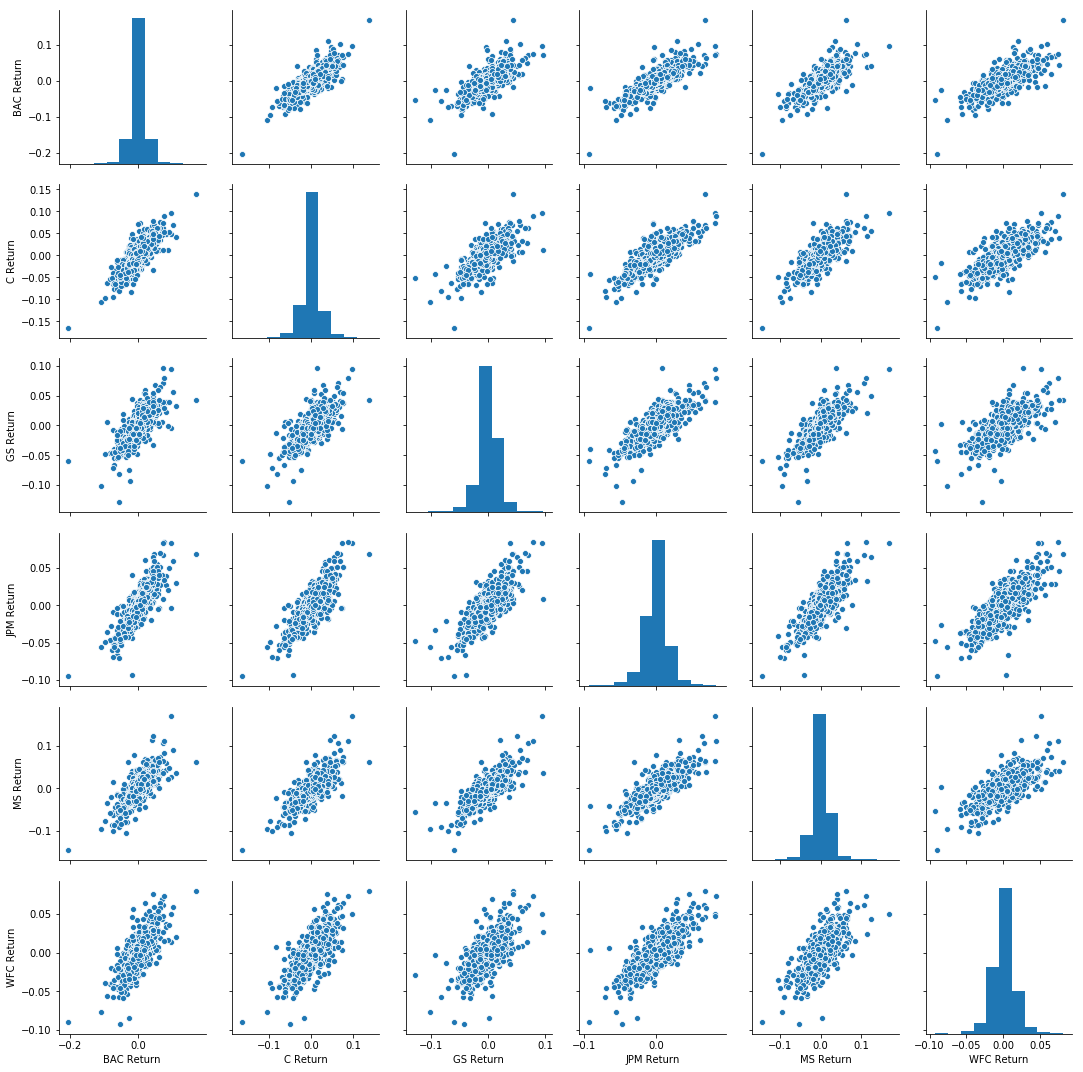

In [12]:
sns.pairplot(returns[1:])
# because the NAN will cause an error, 
# specify that you want the data starting at index 1

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [13]:
# worst single day returns
returns.idxmin()

BAC Return   2011-08-08
C Return     2011-08-08
GS Return    2010-04-16
JPM Return   2011-08-08
MS Return    2011-08-08
WFC Return   2018-02-05
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [14]:
# best single day returns
# Citigroup stock split & BAC too
returns.idxmax()

BAC Return   2011-08-09
C Return     2011-08-09
GS Return    2019-01-16
JPM Return   2011-11-30
MS Return    2011-10-27
WFC Return   2011-08-09
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [15]:
returns.std()

BAC Return    0.021029
C Return      0.019938
GS Return     0.016686
JPM Return    0.016144
MS Return     0.021341
WFC Return    0.015394
dtype: float64

In [22]:
returns.loc['2015-01-01': '2015-12-31'].std()

BAC Return    0.016152
C Return      0.015280
GS Return     0.014024
JPM Return    0.013965
MS Return     0.016008
WFC Return    0.012550
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/chidinmako/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



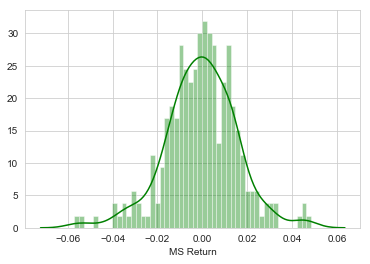

In [36]:
sns.distplot(returns.loc['2015-01-01': '2015-12-31']['MS Return'], color='green', bins=50)

** Create a distplot using seaborn of the 2011 returns for CitiGroup **

/Users/chidinmako/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



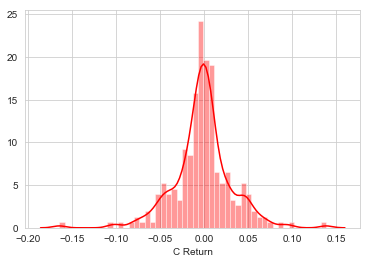

In [37]:
sns.distplot(returns.loc['2011-01-01':'2011-12-31']['C Return'], color='red', bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

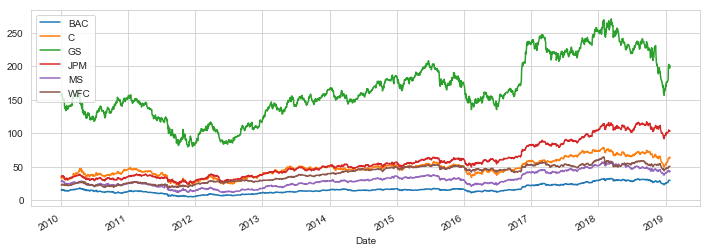

In [38]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

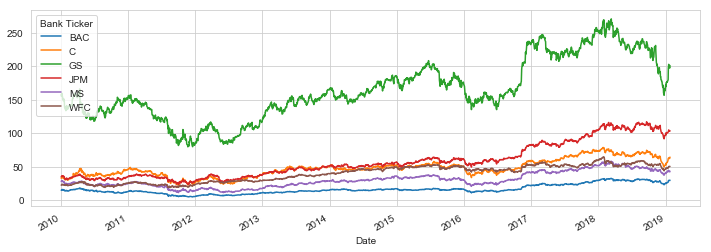

In [44]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))

In [42]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

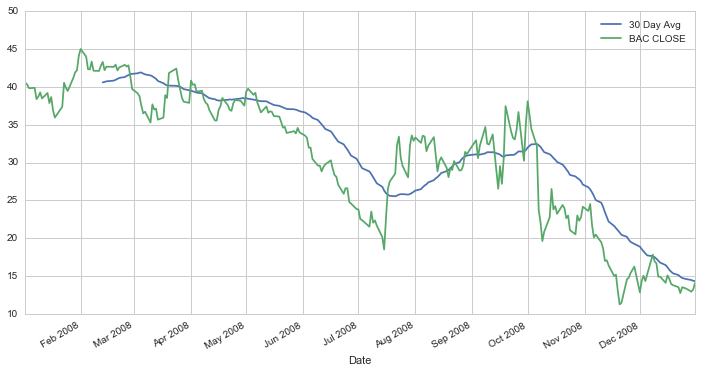

In [141]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2011-01-01':'2012-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2011-01-01':'2012-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

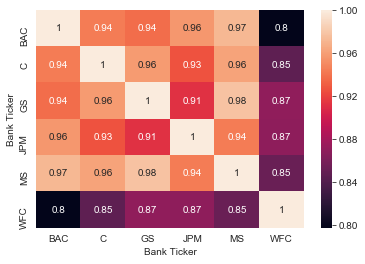

In [61]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1, level='Stock Info').corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

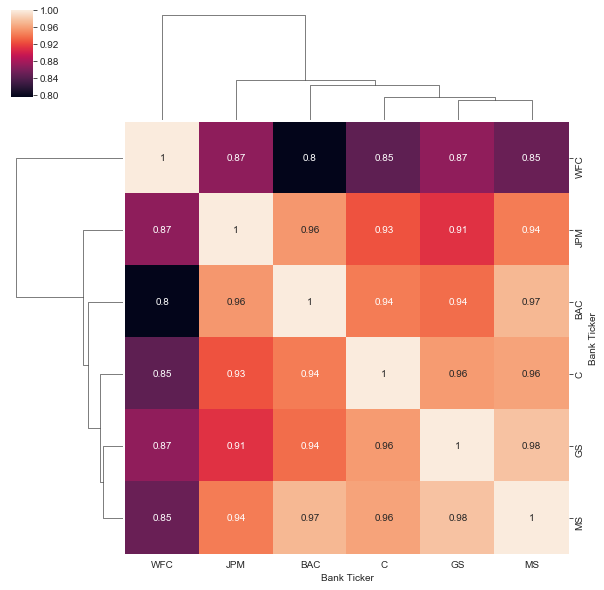

In [63]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

In [66]:
# Plotly
close_stock = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_stock.iplot(kind='heatmap', colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [67]:
BAC.head()

Open   High     Low  Close      Volume
Date                                               
2019-01-25  29.28  29.72  29.135  29.58  72196279.0
2019-01-24  28.75  29.20  28.740  29.08  59492344.0
2019-01-23  29.22  29.28  28.620  28.92  79425856.0
2019-01-22  28.98  29.30  28.890  29.09  84861427.0
2019-01-18  29.02  29.46  28.710  29.30  97928158.0

In [75]:
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [79]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [81]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.